In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns

def set_fig_size(size=(6,4)):
    sns.set(rc={'figure.figsize': size})
    sns.set_style("white")
    
def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")
    
import glob
import json
import os
import sys
import shutil

set_fig_size()

In [2]:
latest = sorted(list(map(lambda x: os.path.basename(x), glob.glob("subjective/*"))))[-1]
print(f"selected results from {latest}")

#df = pd.read_csv(f"subjective/{latest}/_feedback.csv")
dr = pd.read_csv(f"subjective/{latest}/_ratings.csv")
#dq = pd.read_csv(f"subjective/{latest}/_questionnaire.csv")
#dp = pd.read_csv(f"subjective/{latest}/_user_playlist.csv")

# df,dq,dp not included in shared data

#d(df)
d(dr)
#d(dq)
#d(dp)

selected results from 2023_04_13


,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp
0,1,-1,NaN,user_registered,-1,2023-04-05 14:01:11 082659
1,2,-1,NaN,user_registered,-1,2023-04-05 14:01:50 005451
2,1,836,./stimuli/lanczos/x2/IMG_20190531_214259013.png,radio,3,2023-04-05 14:03:23 968435
3,1,836,./stimuli/lanczos/x2/IMG_20190531_214259013.png,ww,1920,2023-04-05 14:03:23 968435
4,1,836,./stimuli/lanczos/x2/IMG_20190531_214259013.png,wh,969,2023-04-05 14:03:23 968435
...,...,...,...,...,...,...
159000,223,1492,./stimuli/waifu2x/x4/MG_9180.png,quality_meta,-1,2023-04-12 22:07:28 185033
159001,223,1492,./stimuli/waifu2x/x4/MG_9180.png,pi,1,2023-04-12 22:07:28 185033
159002,223,-1,NaN,user_done,-1,2023-04-12 22:07:28 222718
159003,225,-1,NaN,user_registered,-1,2023-04-13 07:09:09 217626


In [3]:
dstart = dr[dr["rating_type"] == "user_registered"][["user_ID", "timestamp"]].copy()
dstart = dstart.rename(columns={"timestamp": "start"})

dend = dr[dr["rating_type"] == "user_done"][["user_ID", "timestamp"]].copy()
dend = dend.rename(columns={"timestamp": "end"})

dstart_end = pd.merge(dend, dstart, left_on="user_ID", right_on="user_ID")
dstart_end["start_timestamp"] = pd.to_datetime(dstart_end["start"], format='%Y-%m-%d %H:%M:%S %f')
dstart_end["end_timestamp"] = pd.to_datetime(dstart_end["end"], format='%Y-%m-%d %H:%M:%S %f')
dstart_end["dur_[min]"] = (dstart_end["end_timestamp"] - dstart_end["start_timestamp"]).dt.seconds / 60
print(dstart_end.dtypes)
dstart_end = dstart_end[dstart_end["dur_[min]"] < 120]
d(dstart_end.head())

user_ID                     int64
end                        object
start                      object
start_timestamp    datetime64[ns]
end_timestamp      datetime64[ns]
dur_[min]                 float64
dtype: object


,user_ID,end,start,start_timestamp,end_timestamp,dur_[min]
0,1,2023-04-05 14:40:35 746593,2023-04-05 14:01:11 082659,2023-04-05 14:01:11.082659,2023-04-05 14:40:35.746593,39.400000
1,3,2023-04-05 17:40:05 475741,2023-04-05 17:07:40 760015,2023-04-05 17:07:40.760015,2023-04-05 17:40:05.475741,32.400000
2,3,2023-04-05 17:43:16 167442,2023-04-05 17:07:40 760015,2023-04-05 17:07:40.760015,2023-04-05 17:43:16.167442,35.583333
3,3,2023-04-05 17:43:24 570190,2023-04-05 17:07:40 760015,2023-04-05 17:07:40.760015,2023-04-05 17:43:24.570190,35.716667
5,7,2023-04-06 13:41:11 820235,2023-04-06 13:09:48 859053,2023-04-06 13:09:48.859053,2023-04-06 13:41:11.820235,31.366667


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


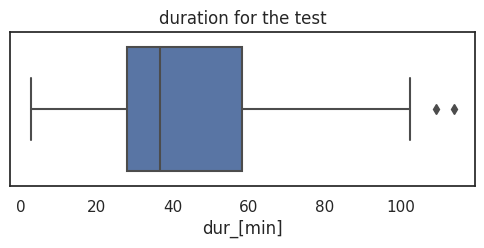

In [4]:

set_fig_size((6,2))

ax = sns.boxplot(x="dur_[min]", data=dstart_end)
save_fig(ax, "duration for the test", "duration_all.pdf")

In [5]:
print(set(dr["rating_type"].values))
dratings = dr[dr["rating_type"] == "radio"].copy()
dratings["rating"] = dratings["rating"].apply(int)
d(dratings)

{'ww', 'user_registered', 'radio', 'user_done', 'wh', 'start_timestamp', 'pi', 'wz', 'quality_meta'}


,user_ID,stimuli_ID,stimuli_file,rating_type,rating,timestamp
2,1,836,./stimuli/lanczos/x2/IMG_20190531_214259013.png,radio,3,2023-04-05 14:03:23 968435
9,1,769,./stimuli/Real-ESRGAN/x4/IMG_6457.png,radio,4,2023-04-05 14:03:40 663249
16,1,1053,./stimuli/lanczos/x4/IMG_7392_.png,radio,3,2023-04-05 14:03:50 350599
23,1,24,./stimuli/BSRGAN/x2/IMG_20191031_173218684_BSR...,radio,4,2023-04-05 14:05:38 537707
30,1,1029,./stimuli/lanczos/x4/IMG_5982.png,radio,1,2023-04-05 14:05:43 542287
...,...,...,...,...,...,...
158967,223,26,./stimuli/BSRGAN/x2/IMG_20191130_131452287_HDR...,radio,4,2023-04-12 22:07:07 201999
158974,223,1180,./stimuli/src_images_1080/x1/IMG_6837.png,radio,3,2023-04-12 22:07:13 892239
158981,223,194,./stimuli/BSRGAN/x4/IMG_5188_BSRGAN.png,radio,4,2023-04-12 22:07:19 280492
158988,223,146,./stimuli/BSRGAN/x4/IMG_0651_BSRGAN.png,radio,3,2023-04-12 22:07:23 501691


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


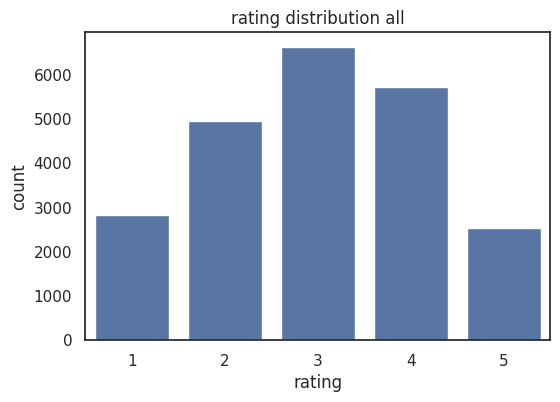

In [6]:
set_fig_size((6,4))
ax = sns.countplot(data=dratings, x="rating", color="b")

save_fig(ax, "rating distribution all", "rating_dist_all.pdf")

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


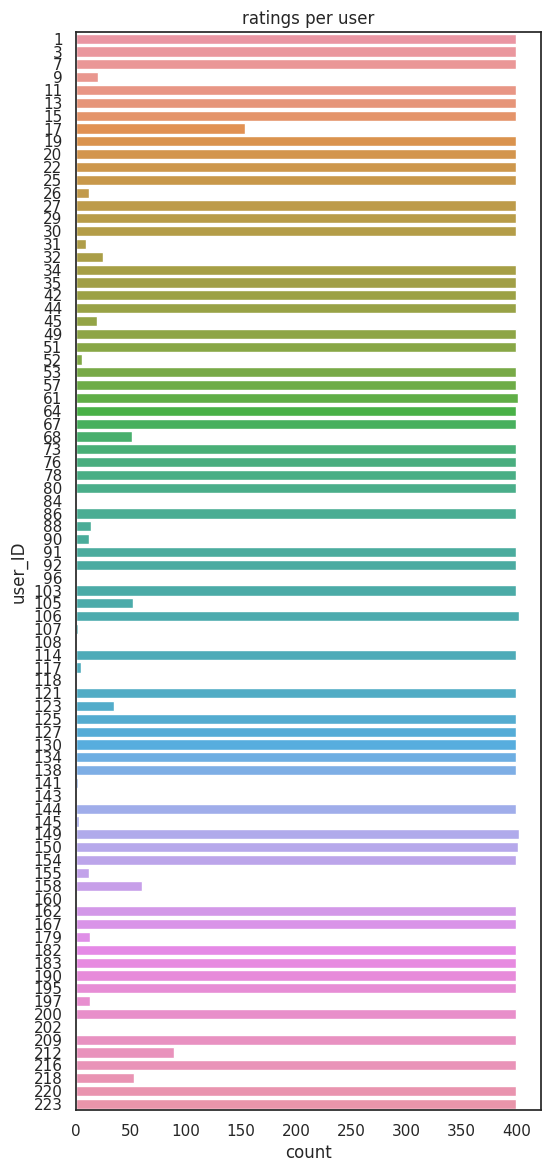

In [7]:
set_fig_size((6,14))

ax = sns.countplot(y="user_ID", data=dratings)
save_fig(ax, "ratings per user", "ratings_per_user.pdf")


In [8]:

dc = dratings[["user_ID", "stimuli_ID"]].groupby(by="user_ID").count().reset_index()

valid_users = set(dc[dc["stimuli_ID"] > 200]["user_ID"].values)
all_users = set(dratings["user_ID"].values)

print(f"estimated valid users: {len(valid_users)} of {len(all_users)}")

dratings["valid_user"] = dratings["user_ID"].apply(
    lambda x:
        x in valid_users
)
dratings = dratings[dratings["valid_user"]].copy()


estimated valid users: 55 of 84


all upscalers: {'Real-ESRGAN', 'lanczos', 'KXNet', 'BSRGAN', 'src_images_1080', 'waifu2x'}
all factors: {'x4', 'x2', 'x1'}


,stimuli_file,mos,count,ci,std,factor,upscaler,base_img
0,./stimuli/BSRGAN/x2/01_IMG_9678_BSRGANx2.png,3.500000,14,1.414293,1.224745,x2,BSRGAN,01_IMG_9678
1,./stimuli/BSRGAN/x2/01_IMG_9832_BSRGANx2.png,4.000000,10,0.953809,0.666667,x2,BSRGAN,01_IMG_9832
2,./stimuli/BSRGAN/x2/01_IMG_9943_BSRGANx2.png,4.000000,16,1.029588,0.966092,x2,BSRGAN,01_IMG_9943
3,./stimuli/BSRGAN/x2/01_IMG_9988_BSRGANx2.png,3.625000,16,1.020354,0.957427,x2,BSRGAN,01_IMG_9988
4,./stimuli/BSRGAN/x2/01_IMG_9996_BSRGANx2.png,3.000000,10,1.348890,0.942809,x2,BSRGAN,01_IMG_9996
...,...,...,...,...,...,...,...,...
1491,./stimuli/waifu2x/x4/MG_9166.png,2.538462,13,1.269054,1.050031,x4,waifu2x,MG_9166
1492,./stimuli/waifu2x/x4/MG_9180.png,2.125000,16,1.020354,0.957427,x4,waifu2x,MG_9180
1493,./stimuli/waifu2x/x4/MG_9215.png,1.937500,16,1.063502,0.997914,x4,waifu2x,MG_9215
1494,./stimuli/waifu2x/x4/OUT_8905.png,1.583333,12,1.265917,0.996205,x4,waifu2x,OUT_8905


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


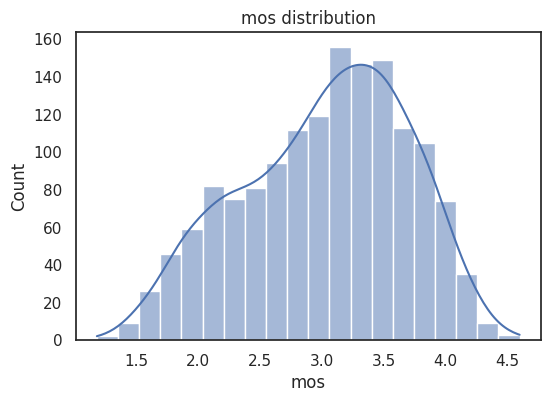

In [9]:
import scipy.stats as st



def calc_stats(x):
    r = x["rating"]
    y = st.t.interval(0.95, len(r) - 1, loc=np.mean(r), scale=st.sem(r))
    return pd.Series(
        {
            "mos": r.mean(),
            "count": len(r),
            "ci": y[1] - y[0],
            "std": r.std()
        }
    )


dmos = dratings[["stimuli_file", "rating"]].groupby(by="stimuli_file").apply(calc_stats).reset_index()
dmos["count"] = dmos["count"].apply(int)

dmos["factor"] = dmos["stimuli_file"].apply(lambda x: x.split("/")[3])
dmos["upscaler"] = dmos["stimuli_file"].apply(lambda x: x.split("/")[2])


def extract_baseimg(x):
    bn = os.path.basename(x).replace("_BSRGANx2", "").replace("_BSRGAN", "")
    
    if "KXNet" in x:
        bn = bn.replace("_.png", ".png")
    
    return os.path.splitext(bn)[0]


dmos["base_img"] = dmos["stimuli_file"].apply(
    lambda x: extract_baseimg(x)
        
)

print(f"""all upscalers: {set(dmos["upscaler"].values)}""")
print(f"""all factors: {set(dmos["factor"].values)}""")
d(dmos)

dmos.to_csv("mos.csv", index=False)

set_fig_size((6,4))
ax = sns.histplot(x="mos", data=dmos, kde=True)
save_fig(ax, "mos distribution", "mos_dist.pdf")

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


a value: 0.275


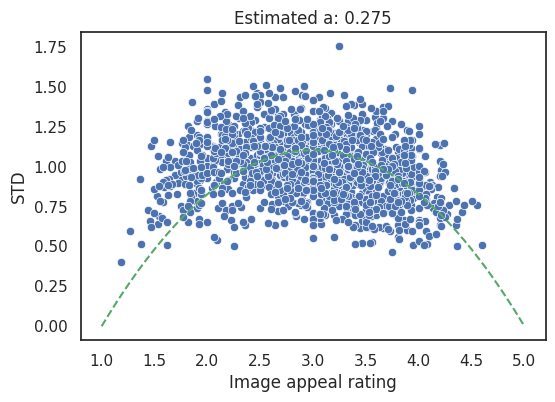

In [10]:
set_fig_size((6,4))

ax = sns.scatterplot(x="mos", y="std", data=dmos)

#, with the y=(x-1)*(x-5)* a interpolated function 

x_data = dmos["mos"].values
y_data = dmos["std"].replace(np.NaN, 0).values

from scipy.optimize import curve_fit

def fitting_function(x, a):
    return (x - 1) * (x - 5) * (-a)

popt, pcov = curve_fit(fitting_function, x_data, y_data) 


x = np.linspace(1, 5, 100)
ax.plot(x, fitting_function(x, *popt), 'g--')
ax.set_xlabel("Image appeal rating")
ax.set_ylabel("STD")
a = popt[0].round(3)
print(f"a value: {a}")
save_fig(ax, f"Estimated a: {a}", "sos_plot_appeal.pdf")

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):



images have been rated: 
* min: 4
* mean: 14.709893048128341
* max: 25




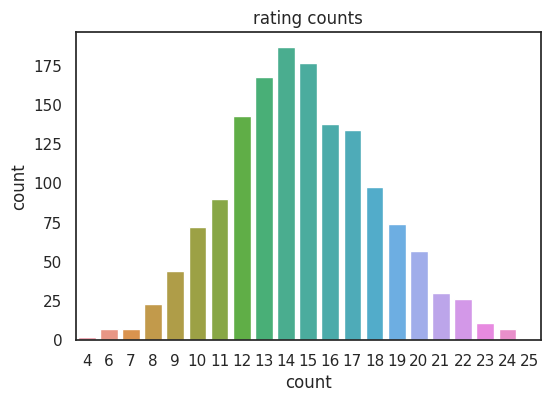

In [11]:
set_fig_size((6,4))
ax = sns.countplot(x="count", data=dmos)
save_fig(ax, "rating counts", "rating_count.pdf")

print(f"""
images have been rated: 
* min: {dmos["count"].min()}
* mean: {dmos["count"].mean()}
* max: {dmos["count"].max()}

"""
)

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

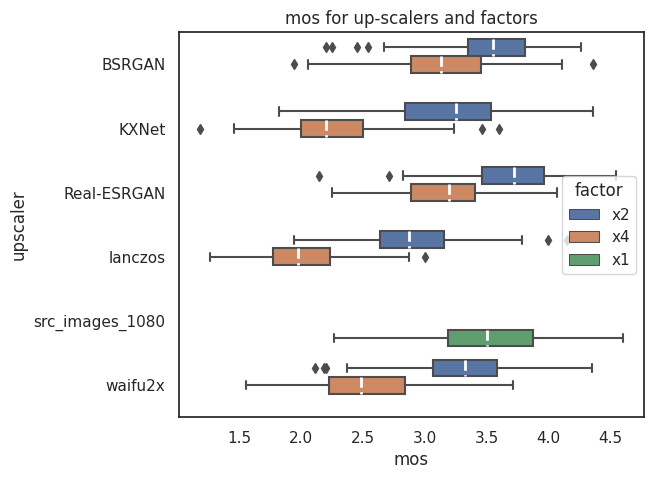

In [12]:
set_fig_size((6,5))
ax = sns.boxplot(x="mos", y="upscaler", hue="factor", data=dmos, medianprops={"color": "white", "lw":2, "linestyle":"--"})
save_fig(ax, "mos for up-scalers and factors", "mos_upscalers_factors.pdf")

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

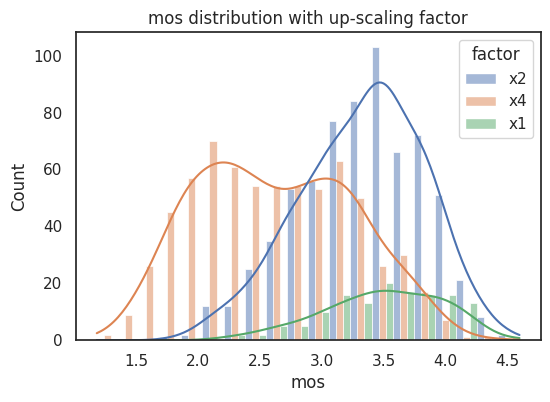

In [13]:
set_fig_size((6,4))
ax = sns.histplot(x="mos", hue="factor", data=dmos, multiple='dodge', kde=True)
save_fig(ax, "mos distribution with up-scaling factor", "mos_factors.pdf")

,base_img,factor,pref_upscaler,pref_mos
0,01_IMG_9678,x2,Real-ESRGAN,4.000000
1,01_IMG_9678,x4,Real-ESRGAN,3.176471
2,01_IMG_9832,x2,BSRGAN,4.000000
3,01_IMG_9832,x4,BSRGAN,3.333333
4,01_IMG_9943,x2,Real-ESRGAN,4.200000
...,...,...,...,...
267,MG_9215,x4,Real-ESRGAN,2.894737
268,OUT_8905,x2,BSRGAN,3.416667
269,OUT_8905,x4,Real-ESRGAN,3.050000
270,blume,x2,Real-ESRGAN,4.428571


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

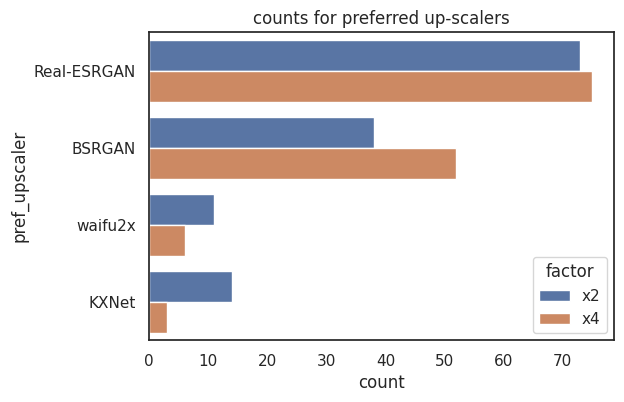

In [14]:
dpref = dmos[dmos["factor"] != "x1"].groupby(by=["base_img", "factor"]).apply(
    lambda x:
        pd.Series({
            'pref_upscaler': x.iloc[x["mos"].argmax()]["upscaler"],
            "pref_mos": x["mos"].max()
        })
).reset_index()

d(dpref)
set_fig_size((6,4))

dpref.to_csv("pref.csv", index=False)

ax = sns.countplot(y="pref_upscaler", hue="factor", data=dpref)
save_fig(ax, "counts for preferred up-scalers", "dist_preferred_upscalers.pdf")



/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

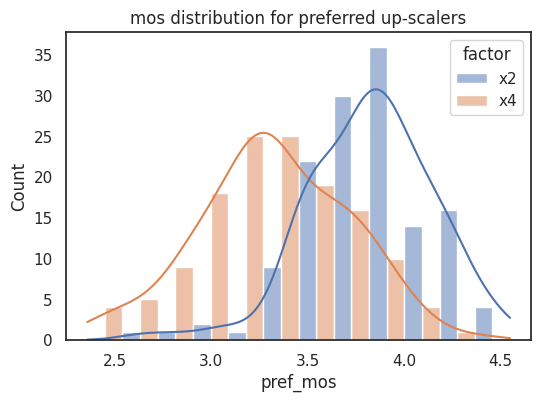

In [15]:
set_fig_size((6,4))
ax = sns.histplot(x="pref_mos", hue="factor", data=dpref, multiple='dodge', kde=True)
save_fig(ax, "mos distribution for preferred up-scalers", "mos_preferred_upscalers.pdf")


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


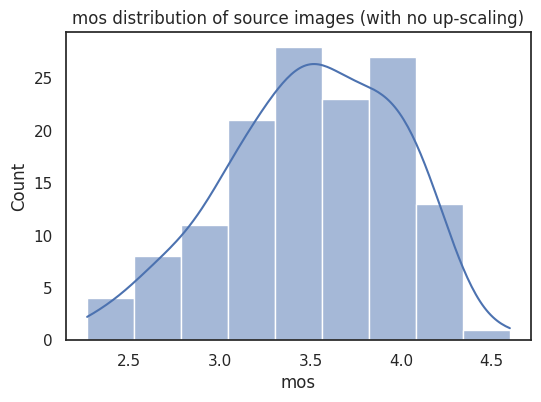

In [16]:
src_imgs = dmos[dmos["factor"] == "x1"]

set_fig_size((6,4))
ax = sns.histplot(x="mos", data=src_imgs, kde=True)
save_fig(ax, "mos distribution of source images (with no up-scaling)", "mos_dist_source_images.pdf")

,base_img,factor,pref_upscaler,pref_mos,mos,delta_mos,real_pref
0,01_IMG_9678,x2,Real-ESRGAN,4.000000,3.777778,-0.222222,0
1,01_IMG_9678,x4,Real-ESRGAN,3.176471,3.777778,0.601307,1
2,01_IMG_9832,x2,BSRGAN,4.000000,4.200000,0.200000,1
3,01_IMG_9832,x4,BSRGAN,3.333333,4.200000,0.866667,1
4,01_IMG_9943,x2,Real-ESRGAN,4.200000,4.600000,0.400000,1
...,...,...,...,...,...,...,...
267,MG_9215,x4,Real-ESRGAN,2.894737,2.600000,-0.294737,0
268,OUT_8905,x2,BSRGAN,3.416667,2.727273,-0.689394,0
269,OUT_8905,x4,Real-ESRGAN,3.050000,2.727273,-0.322727,0
270,blume,x2,Real-ESRGAN,4.428571,3.533333,-0.895238,0


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

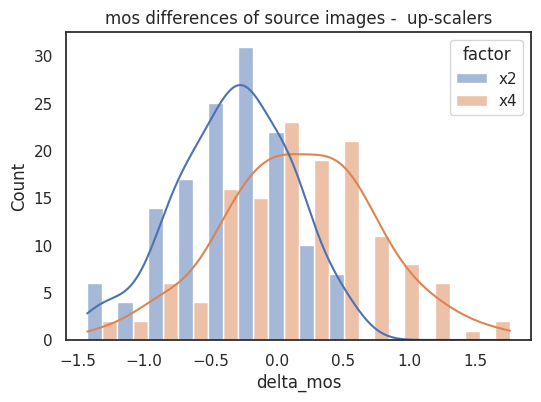

In [17]:
dpref_src = pd.merge(dpref, src_imgs[["base_img", "mos"]], left_on="base_img", right_on="base_img")

dpref_src["delta_mos"] = dpref_src["mos"] - dpref_src["pref_mos"] 

dpref_src["real_pref"] = dpref_src["delta_mos"].apply(lambda x: 1 if x > 0 else 0)
d(dpref_src)
set_fig_size((6,4))
ax = sns.histplot(x="delta_mos", hue="factor", data=dpref_src, multiple='dodge', kde=True)
save_fig(ax, "mos differences of source images -  up-scalers", "diff_mos.pdf")

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

,real_pref,factor,count,%
0,0,x2,101,74.0
1,0,x4,55,40.0
2,1,x2,35,26.0
3,1,x4,81,60.0


\begin{tabular}{rlrr}
\toprule
real_pref & factor & count & % \\
\midrule
0 & x2 & 101 & 74.000000 \\
0 & x4 & 55 & 40.000000 \\
1 & x2 & 35 & 26.000000 \\
1 & x4 & 81 & 60.000000 \\
\bottomrule
\end{tabular}



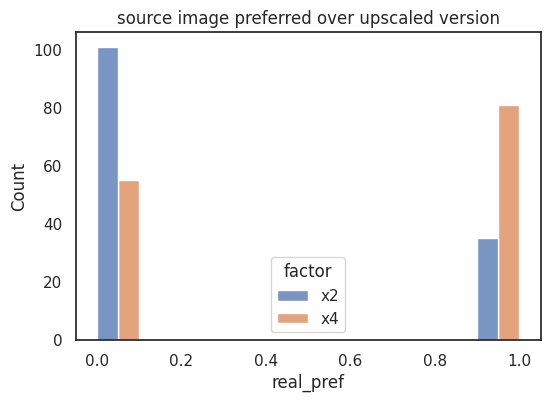

In [18]:
set_fig_size((6,4))
ax = sns.histplot(x="real_pref", hue="factor", data=dpref_src, multiple='dodge')
save_fig(ax, "source image preferred over upscaled version", "count_pref.pdf")

count_table = dpref_src[["real_pref", "factor", "base_img"]].groupby(by=["real_pref", "factor"]).count().reset_index().rename(
    columns={"base_img": "count"}
)

count_table["%"] =  np.round(100 * count_table["count"] / len(set(dpref_src["base_img"].values)), 0)
d(count_table)
print(count_table.to_latex(index=False))

In [19]:
dpref_src

,base_img,factor,pref_upscaler,pref_mos,mos,delta_mos,real_pref
0,01_IMG_9678,x2,Real-ESRGAN,4.000000,3.777778,-0.222222,0
1,01_IMG_9678,x4,Real-ESRGAN,3.176471,3.777778,0.601307,1
2,01_IMG_9832,x2,BSRGAN,4.000000,4.200000,0.200000,1
3,01_IMG_9832,x4,BSRGAN,3.333333,4.200000,0.866667,1
4,01_IMG_9943,x2,Real-ESRGAN,4.200000,4.600000,0.400000,1
...,...,...,...,...,...,...,...
267,MG_9215,x4,Real-ESRGAN,2.894737,2.600000,-0.294737,0
268,OUT_8905,x2,BSRGAN,3.416667,2.727273,-0.689394,0
269,OUT_8905,x4,Real-ESRGAN,3.050000,2.727273,-0.322727,0
270,blume,x2,Real-ESRGAN,4.428571,3.533333,-0.895238,0


In [20]:
dpref_src[dpref_src["base_img"] == "01_IMG_9678"]

,base_img,factor,pref_upscaler,pref_mos,mos,delta_mos,real_pref
0,01_IMG_9678,x2,Real-ESRGAN,4.000000,3.777778,-0.222222,0
1,01_IMG_9678,x4,Real-ESRGAN,3.176471,3.777778,0.601307,1


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

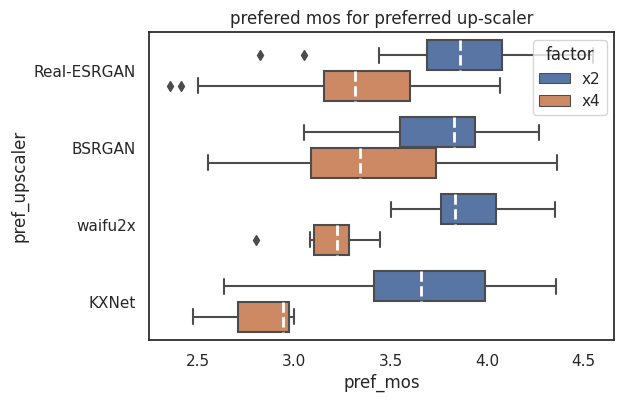

In [21]:
set_fig_size((6,4))
ax = sns.boxplot(x="pref_mos", y="pref_upscaler", hue="factor", data=dpref, medianprops={"color": "white", "lw":2, "linestyle":"--"})
save_fig(ax, "prefered mos for preferred up-scaler", "pref_mos_pref_upscaler.pdf")

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


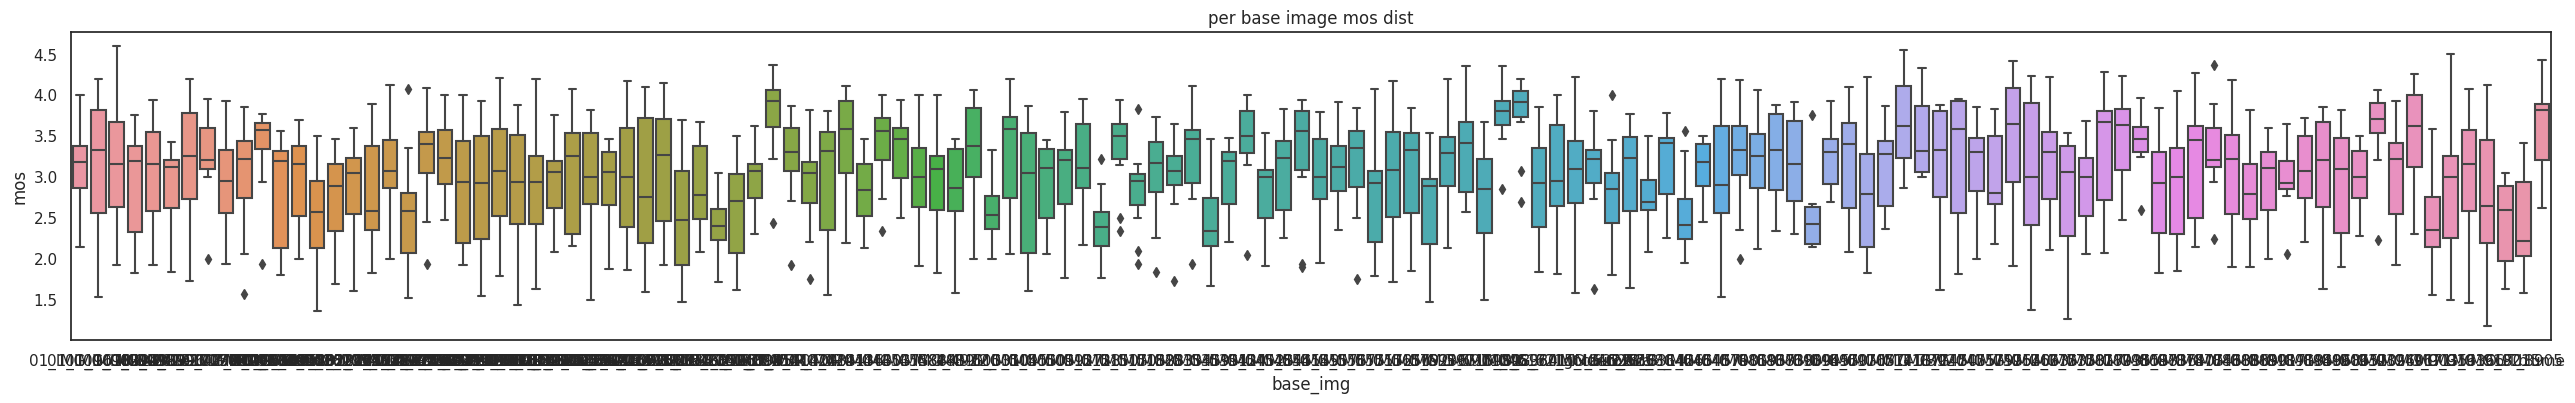

In [22]:
set_fig_size((32,4))
ax = sns.boxplot(x="base_img", y="mos", data=dmos)
save_fig(ax, "per base image mos dist", "per_base_img_mos.pdf")